In [73]:
import numpy as np
from numpy import *
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing

In [80]:
def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))


In [81]:
class PointDataset(Dataset):
    def __init__(self):
        scaler = StandardScaler()
        # scaler = preprocessing.MinMaxScaler()
        self.frame = pd.read_csv('./data/trainSet.csv')
        self.frame.insert(0, 'constant', 1)
        self.labels = self.frame.label
        # print(self.labels)
        self.frame = self.frame.drop(columns=['label'])
        self.frame = scaler.fit_transform(self.frame.astype(float))
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # print(self.frame.loc[idx,:])
        #x = torch.Tensor(np.array([self.frame.loc[idx,:]])).reshape(33)
        x = torch.Tensor(self.frame[idx]).reshape(33)
        y = torch.Tensor(np.array([self.labels[idx]])).reshape(1)
        sample = {'features':x,'labels':y}
        return sample

In [82]:
def test(weight):
    scaler = StandardScaler()
    train = pd.read_csv('./data/trainSet.csv')
    train.insert(0, 'constant', 1)
    labels = np.array(train.label).reshape(200000)
    features = train.drop(columns=['label'])
    features = scaler.fit_transform(features.astype(float))
    features = np.array(features)
    acc = 0
    test = []
    weight = np.array(weight).reshape(33)
    for i in range(200000):
        t = sigmoid(np.sum(np.dot(weight,features[i])))
        if t >= 0.5:
            test.append(1)
        else:
            test.append(0)
    for i in range(200000):
        if test[i] == labels[i]:
            acc += 1
    return acc/len(labels)

In [87]:
def show_plot(y, title, x_l, y_l):
    x = np.array(range(len(y)))
    y = np.array(y)
    plt.plot(x, y, c='b')
    plt.axis()
    plt.title(title)
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.show()

In [102]:
def write(weight):
    scaler = StandardScaler()
    test = pd.read_csv('./data/test set.csv')
    test.insert(0, 'constant', 1)
    test = scaler.fit_transform(test.astype(float))
    test = np.array(test)
    weight = np.array(weight).reshape(33)
    result = []
    for i in range(len(test)):
        t = sigmoid(np.sum(np.dot(weight,test[i])))
        if t >= 0.5:
            result.append(1)
        else:
            result.append(0)
    df = pd.DataFrame({'Predicted':result})
    df.index += 1
    df.to_csv('./data/sub.csv', index = True, index_label = 'id')

In [84]:
def train(trainloader, epoches, base, bitch_size):
    weight = np.random.random((33,1))
    acc = []
    err = []
    for i in range(epoches):
        print('epoche', i)
        lr = 1/(base*(i + 1))
        for j, data in enumerate(trainloader):
            features = np.array(data['features'])
            label = np.array(data['labels'])
            #print(label.shape)
            output = sigmoid(np.dot(features,weight))
            error = label - output
            weight = weight + lr*np.dot(features.T,error)/len(features)
        if i%10 == 0:
            acc_v = test(weight)
            print(acc_v)
            acc.append(acc_v)
            j = (label * np.log(output) + ([1] - label) * np.log([1] - output)).sum()/(0-bitch_size)
            err.append(j)
    return weight, acc, err
     

In [85]:
bitch_size = 64
epoches = 1000
base = 100
trainset = PointDataset()
trainloader = DataLoader(dataset=trainset,batch_size=bitch_size)
weight, acc, error = train(trainloader, epoches, base, bitch_size)

epoche 0
0.591415
epoche 1
epoche 2
epoche 3
epoche 4
epoche 5
epoche 6
epoche 7
epoche 8
epoche 9
epoche 10
0.6039
epoche 11
epoche 12
epoche 13
epoche 14
epoche 15
epoche 16
epoche 17
epoche 18
epoche 19
epoche 20
0.605035
epoche 21
epoche 22
epoche 23
epoche 24
epoche 25
epoche 26
epoche 27
epoche 28
epoche 29
epoche 30
0.605455
epoche 31
epoche 32
epoche 33
epoche 34
epoche 35
epoche 36
epoche 37
epoche 38
epoche 39
epoche 40
0.605635
epoche 41
epoche 42
epoche 43
epoche 44
epoche 45
epoche 46
epoche 47
epoche 48
epoche 49
epoche 50
0.60556
epoche 51
epoche 52
epoche 53
epoche 54
epoche 55
epoche 56
epoche 57
epoche 58
epoche 59
epoche 60
0.60562
epoche 61
epoche 62
epoche 63
epoche 64
epoche 65
epoche 66
epoche 67
epoche 68
epoche 69
epoche 70
0.605675
epoche 71
epoche 72
epoche 73
epoche 74
epoche 75
epoche 76
epoche 77
epoche 78
epoche 79
epoche 80
0.60573
epoche 81
epoche 82
epoche 83
epoche 84
epoche 85
epoche 86
epoche 87
epoche 88
epoche 89
epoche 90
0.605775
epoche 91
epoch

0.606275
epoche 701
epoche 702
epoche 703
epoche 704
epoche 705
epoche 706
epoche 707
epoche 708
epoche 709
epoche 710
0.60627
epoche 711
epoche 712
epoche 713
epoche 714
epoche 715
epoche 716
epoche 717
epoche 718
epoche 719
epoche 720
0.606275
epoche 721
epoche 722
epoche 723
epoche 724
epoche 725
epoche 726
epoche 727
epoche 728
epoche 729
epoche 730
0.60626
epoche 731
epoche 732
epoche 733
epoche 734
epoche 735
epoche 736
epoche 737
epoche 738
epoche 739
epoche 740
0.60626
epoche 741
epoche 742
epoche 743
epoche 744
epoche 745
epoche 746
epoche 747
epoche 748
epoche 749
epoche 750
0.606265
epoche 751
epoche 752
epoche 753
epoche 754
epoche 755
epoche 756
epoche 757
epoche 758
epoche 759
epoche 760
0.606265
epoche 761
epoche 762
epoche 763
epoche 764
epoche 765
epoche 766
epoche 767
epoche 768
epoche 769
epoche 770
0.60625
epoche 771
epoche 772
epoche 773
epoche 774
epoche 775
epoche 776
epoche 777
epoche 778
epoche 779
epoche 780
0.60626
epoche 781
epoche 782
epoche 783
epoche 784


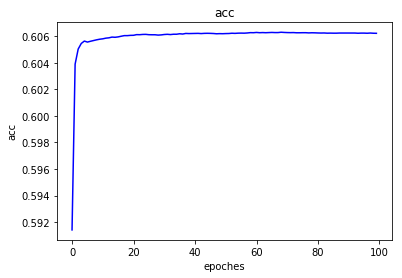

In [98]:
show_plot(acc, 'acc', 'epoches', 'acc')

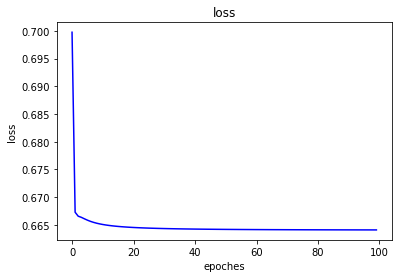

In [100]:
show_plot(error, 'loss', 'epoches', 'loss')

In [103]:
write(weight)